<a href="https://colab.research.google.com/github/ARUNREDDYPOREDDY/STML-2303A52278/blob/main/STML_PROJECT_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-MEDIOD:

In [9]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395099 sha256=048c334197d408bd37ba179c973e70a71792bfb3e684f2d8ef3e3127d8a99899
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


Silhouette Score: 0.17
Accuracy: 0.81
Precision: 0.80
Recall: 0.81
F1 Score: 0.80
Adjusted Rand Index (ARI): 0.37
Normalized Mutual Information (NMI): 0.28


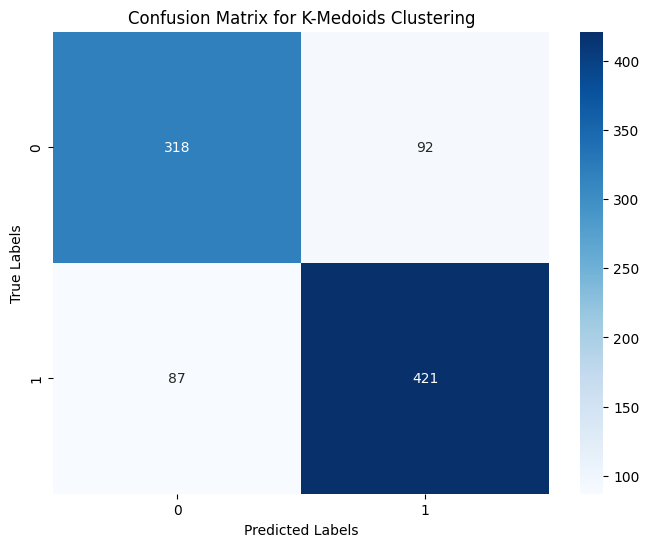

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    silhouette_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
from sklearn_extra.cluster import KMedoids
from scipy.stats import mode
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/heart.csv')

# Assume the last column is the target variable (only used for evaluation, not for training)
X = data.iloc[:, :-1]  # Features (all columns except the last)
y_true = data.iloc[:, -1]  # True labels (the last column)

# Identify categorical features (replace with actual categorical column names if different)
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Standardize the data (only apply to numerical features)
numerical_features = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Set number of clusters, assuming it’s the same as the number of unique classes in y_true
n_clusters = len(y_true.unique())

# Initialize and fit K-Medoids
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
kmedoids.fit(X)

# Get the cluster labels
y_pred = kmedoids.labels_

# Map each cluster label to the true label that appears most frequently in that cluster
mapped_labels = y_pred.copy()
for cluster in range(n_clusters):
    mask = (y_pred == cluster)
    most_common_label = mode(y_true[mask]).mode  # Get the most common true label in each cluster
    mapped_labels[mask] = most_common_label

# Calculate silhouette score
sil_score = silhouette_score(X, y_pred)
print(f"Silhouette Score: {sil_score:.2f}")

# Calculate accuracy, precision, recall, and F1-score using mapped labels
accuracy = accuracy_score(y_true, mapped_labels)
precision = precision_score(y_true, mapped_labels, average='weighted')
recall = recall_score(y_true, mapped_labels, average='weighted')
f1 = f1_score(y_true, mapped_labels, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Evaluate clustering with ARI and NMI
ari_score = adjusted_rand_score(y_true, y_pred)
nmi_score = normalized_mutual_info_score(y_true, y_pred)

print(f"Adjusted Rand Index (ARI): {ari_score:.2f}")
print(f"Normalized Mutual Information (NMI): {nmi_score:.2f}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, mapped_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y_true.unique(), yticklabels=y_true.unique())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for K-Medoids Clustering")
plt.show()


KNN

Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        77
           1       0.88      0.83      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



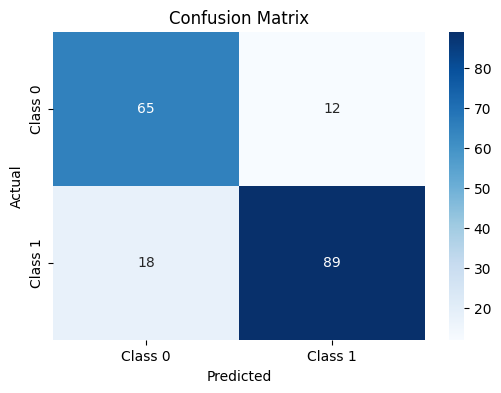

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/heart.csv')

# Assume the last column is the target variable
X = data.iloc[:, :-1]  # Features (all columns except the last)
y = data.iloc[:, -1]   # Target (last column)

# Identify categorical features (replace with actual categorical column names if different)
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Standardize the data (only apply to numerical features)
numerical_features = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust k (n_neighbors) based on your requirements
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


RANDOM FOREST

Random Forest Metrics:
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



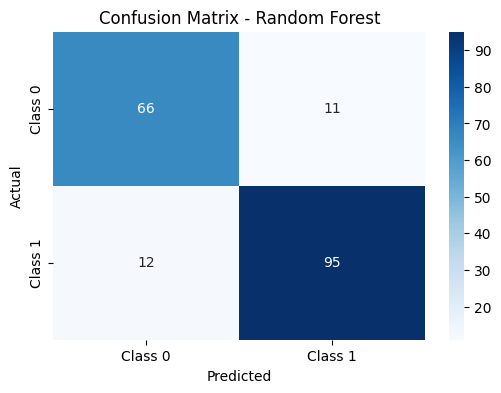

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/heart.csv')

# Assume the last column is the target variable
X = data.iloc[:, :-1]  # Features (all columns except the last)
y = data.iloc[:, -1]   # Target (last column)

# Identify categorical features (replace with actual categorical column names if different)
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Standardize the data (only apply to numerical features)
numerical_features = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


SVM


SVM Metrics:
Accuracy: 0.85
Precision: 0.86
Recall: 0.85
F1 Score: 0.85

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



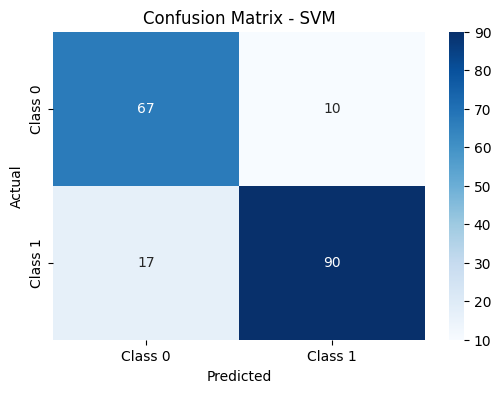

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/heart.csv')

# Assume the last column is the target variable
X = data.iloc[:, :-1]  # Features (all columns except the last)
y = data.iloc[:, -1]   # Target (last column)

# Identify categorical features (replace with actual categorical column names if different)
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Standardize the data (only apply to numerical features)
numerical_features = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluation for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("\nSVM Metrics:")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1 Score: {f1_svm:.2f}")
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix for SVM
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()
